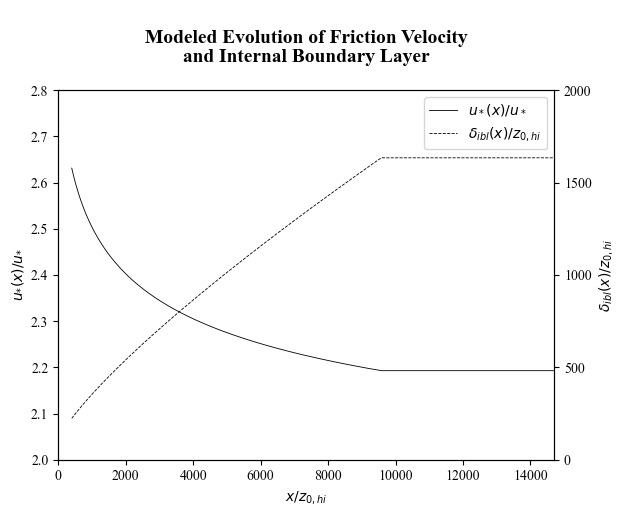

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import latex

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

delta_ibl_0 = 70 # same as calculated in meneveau
z_0hi = 0.68 # same as calculated in meneveau
z_0lo = 0.0001 # same as calculated in meneveau
z_h = 70 # same as calculated in meneveau
s_x = 7 # same as calculated in meneveau
D = 80 # same as calculated in meneveau
f = 10**(-4) # same as calculated in meneveau 
k = 0.4 # same as calculated in meneveau
C_star = 4.5 # same as calculated in meneveau
C = 4 # same as calculated in meneveau
U_G = 10 # They dont specify for the plot?

u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)

x_H_G = (((z_0hi/z_0lo)**(-u_star_hi/(u_star_lo - u_star_hi)) * z_0lo - z_h)/z_0hi)**(5/4) * z_0hi
H_G = z_h + z_0hi * (x_H_G / z_0hi) ** (4 / 5)

# Define x values scaled by z_0hi
x = np.arange(400*0.68, 10000, 1)  # Distance in meters
x_scaled = x/z_0hi # Scale x-axis

# Calculate δ_ibl(x) / z_0hi (scaled internal boundary layer height)
ibl_x = delta_ibl_0 + z_0hi * (x / z_0hi) ** (4 / 5)
ibl_x = ibl_x  # Scale by z_0hi
ibl_x[ibl_x >= H_G] = H_G  # Apply boundary limit

# Calculate u_*(x) / u_* (scaled friction velocity evolution)

u_star_x = u_star_lo * (np.log(ibl_x/z_0lo)) / (np.log(ibl_x/z_0hi))

u_star_x_scaled = u_star_x / u_star_lo

# Calculate δ_ibl(x) / z_0hi (scaled internal boundary layer height)
ibl_x = delta_ibl_0 + z_0hi * (x / z_0hi) ** (4 / 5)
ibl_x = ibl_x / z_0hi  # Scale by z_0hi
ibl_x[ibl_x >= H_G / z_0hi] = H_G / z_0hi  # Apply boundary limit

# Plot both curves
fig, ax1 = plt.subplots()

# Plot u_*(x) / u_*
ax1.plot(x_scaled, u_star_x_scaled, 'k-', label=r'$u_*(x) / u_*$', linewidth=0.6)
ax1.set_xlabel(r'$x / z_{0,hi}$', font = 'Times New Roman')
ax1.set_ylabel(r'$u_{*}(x) / u_{*}$', color='black', font = 'Times New Roman')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(2.0, 2.8)
ax1.set_xlim(0, 14706)

# Create secondary y-axis for δ_ibl(x) / z_0hi
ax2 = ax1.twinx()
ax2.plot(x_scaled, ibl_x, 'k--', label=r'$\delta_{ibl}(x) / z_{0,hi}$', linewidth=0.6)
ax2.set_ylabel(r'$\delta_{ibl}(x) / z_{0,hi}$', color='black', font = 'Times New Roman')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 2000)
ax2.yaxis.set_major_locator(plt.MultipleLocator(500))  # Set y-axis increments to 500

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Title
plt.title(" \n Modeled Evolution of Friction Velocity \n and Internal Boundary Layer \n", fontweight='bold')

# Show the plot
plt.show()